##### AI TECH - Akademia Innowacyjnych Zastosowań Technologii Cyfrowych. Programu Operacyjnego Polska Cyfrowa na lata 2014-2020
<hr>

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<center>
    <h1 style = "font-size:48px; font-weight:normal"><b>AI</b>-TECH</h1>
    <br>
<br>
<br>
<br>
    <h1 style = "font-size:24px; font-weight:normal">Przykład 3 DO LABORATORIUM 1</h1>
    <h1 style = "font-size:24px">z UCZENIA MASZYNOWEGO</h1>
    <h1 style = "font-size:24px">Regresja liniowa i logistyczna</h1>
    <h1 style = "font-size:24px">Tomasz Neumann</h1>
    <h3 style = "font-size:21px">Regresja wielomianowa</h3>
</center>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
    </body>
    </html>

In [ ]:
#@title
%%html
<iframe src="https://www.polskacyfrowa.gov.pl/media/48246/FE_POPC_poziom_pl-1_rgb.jpg" width="800"></iframe>

<center>
Projekt współfinansowany ze środków Unii Europejskiej w ramach Europejskiego Funduszu Rozwoju Regionalnego
Program Operacyjny Polska Cyfrowa na lata 2014-2020,
Oś Priorytetowa nr 3 "Cyfrowe kompetencje społeczeństwa" Działanie  nr 3.2 "Innowacyjne rozwiązania na rzecz aktywizacji cyfrowej"
Tytuł projektu:  „Akademia Innowacyjnych Zastosowań Technologii Cyfrowych (AI Tech)”
    </center>

<hr>

# 1. Przykład 3

W tym przykładzie zostaną przeanalizowane dane, które nie mają trendu liniowego. Okazuje się jednak, że mając model liniowy można tego dokonać na tego typie danych wejściowych poprzez dodanie potęg każdej cechy w postaci nowej cechy i poddaniu treningowi takiego zestawu cech - jest to regresja wielomianowa (polynomial regression).
Na podstawie biblioteki Scikit-Learn i klasy PolynomialFeatures można przeanalizować zmianę położenia w czasie ciała wyrzuconego do góry z prędkością początkową $23~m/s$ z wysokości $8~m$ nad powierzchnią Ziemi.
Rozpoczynamy jak poprzednio od importu potrzebnych bibliotek

In [ ]:
# Import podstawowych bibliotek języka Python
import numpy as np  # operacje numeryczne
import matplotlib  # wykresy i ich ustawienia
import matplotlib.pyplot as plt  # tworzenie wykresu

oraz wygenerowania odpowiednich danych do zakładanego przypadku oraz ich wizualizację.

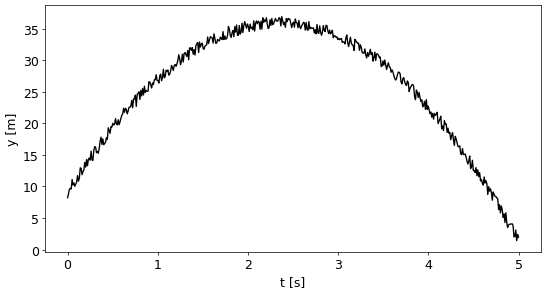

In [ ]:
dataset_training_size = 500
t = x_t = np.linspace(0, 5, dataset_training_size).astype(np.float32)
noise = 2*np.random.rand(dataset_training_size).astype(np.float32)
#y = h0+vo*t-0.5*g*t^2
h0 = 8.0
v0 = 23
g = 9.81

y=h0+v0*t-0.5*g*t**2+noise

# Wizualizacja wygenerowanych danych
# Ustawienia związane z wyświetlaniem
matplotlib.rcParams.update({'font.size': 14})
f = plt.figure(figsize=(10, 5), dpi=64)
f1 = f.add_subplot(111)
f1.set_xlabel('t [s]')
f1.set_ylabel('y [m]')
f1.plot(t,y, "k")
plt.show()

Następnie należy zaimportować klasę <i>PolynomialFeatures</i> oraz stworzyć jej obiekt, podając jako argument stopień wielomianu. Na tym etapie należy zadbać o odpowiednie przygotowanie formatu danych wejściowych oraz odpowiednie przekształcenie cech. Mając to wszystko zrealizowane prawidłowo, można wywołać metodę regresji liniowej, która była wykorzystywana w przykładzie 1.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
t = t.reshape(dataset_training_size,1)
y = y.reshape(dataset_training_size,1)
t_poly = poly_features.fit_transform(t) #obiekt ten zawiera teraz oryginalną cechę t oraz jej kwadrat

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(t_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

[9.000015] [[22.963337  -4.8938994]]


Uzyskane wartości współczynników można porównać z tymi z założeń początkowych.

# Zadania do wykonania

<p><b>Zadanie 1</b></p>
a) W jaki sposób zaszumienie będzie wpływało na wartości wyznaczanych parametrów? Sprawdź wpływ dopasowania wielomianów wyższych stopni do tych danych.

b) Wykorzystaj klasę PolynomialFeatures do wyuczenia współczynników dla wielomianu trzeciego stopnia. Przedstaw dane rzeczywiste oraz te wyuczone z modelu na jednym rysunku.

In [ ]:
#@title
%%html
<iframe src="https://www.polskacyfrowa.gov.pl/media/48246/FE_POPC_poziom_pl-1_rgb.jpg" width="800"></iframe>

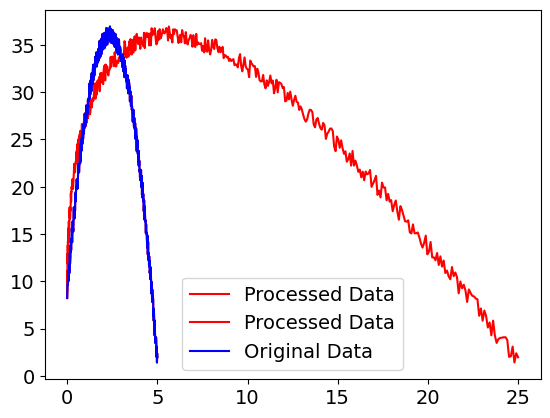

In [ ]:

plt.plot(t_poly,y,color='r',label="Processed Data")
plt.plot(t,y,color='b',label="Original Data")
plt.legend()
plt.show()